# EDA 

1. understand data 
numeric ( discrete(eg:no of pax and continuous eg: wieght, hieght  ), 
categorical ( nominal , ranking)
2. relationship between variables 

read_csv-> test connection -> head() Summary 
1. shape (# columns, #rows  ) eg: 1000 rows , 25 fields / columns 
2. info( 
    2.1 data type of all 25 fields ( numeric=int64,float64 , char/string = object)
    2.2 breakdown : int64(5) float64(5) object (15)
    2.3 null value count for each field 
3.desribe()
    3.1 summary statistics of numerical fields by default 
    3.2 min, max, 1st q , 3rd, median, count, std 

4. Find missing values using isnull().sum() 
5. number of uniue values in the dataset = nunique()
6. count() - count of values of all fields 
7. after finding missing values, replace with mean
8. remove the column if not needed 


# visualizations( matplotlib)
1. Univariate analysis ( one variable ) 
2. Bivariate ( two variable ) 
3. Multivariate analysis ( many variables ) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## USING TITANTIC CSV

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# embarked at.... c= Cherbourg, q= Queenstown, s= southampton

In [4]:
# Step 1 
df.shape

(891, 12)

In [5]:
# Step 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Step 3
df.describe(include='object') # To show non numeric objects in this list

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ostby, Mr. Engelhart Cornelius",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [7]:
# Step 4 Find missing values using isnull().sum()

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Step 5 number of uniue values in the dataset = nunique()

df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
# Step 6 count() - count of values of all fields

C:\Users\pwy_9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

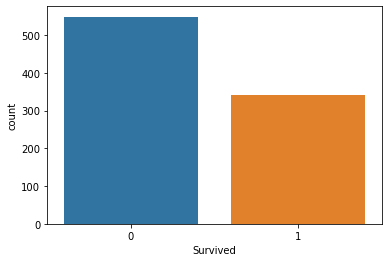

In [10]:
# visualization >> Analysis
## e,g How many survived by using the categorical variable

import seaborn as sns

sns.countplot(df.Survived)

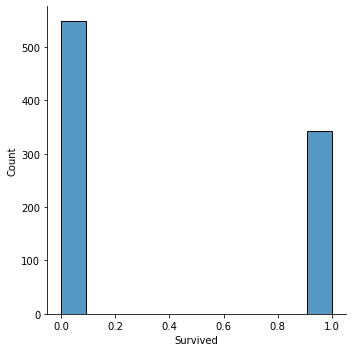

In [11]:
sns.displot(df.Survived)

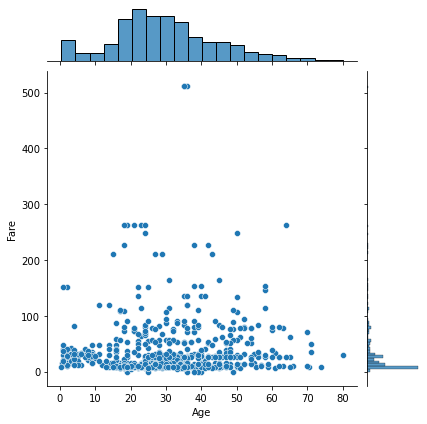

In [12]:
sns.jointplot(x='Age' , y='Fare', data = df)

## USING MOVIES/ RATINGS CSV

In [13]:
movie = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
movie.shape

(62423, 3)

In [15]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [16]:
movie.describe(include='object')

,title,genres
count,62423,62423
unique,62325,1639
top,Classmates (2016),Drama
freq,2,9056


In [17]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [18]:
movie['gen_cat'] = movie['genres'].str.split('|')
movie.head()

,movieId,title,genres,gen_cat
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [19]:
# List down all the movie switch action category
# Which category is the best watched

# Hypothesis  most watch... Comedy >> adventure >> Crime


# Lambda function
# Extract a single word from list... row by row
# axis = 0(row), 1(column)

animation_subset = movie.apply(lambda row: 'Animation' in row['gen_cat'], axis = 1)
animation_df = movie[animation_subset]
animation_df.head()

,movieId,title,genres,gen_cat
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
12,13,Balto (1995),Adventure|Animation|Children,"[Adventure, Animation, Children]"
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,"[Animation, Children, Drama, Musical, Romance]"
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance,"[Animation, Children, Comedy, Romance]"
241,244,Gumby: The Movie (1995),Animation|Children,"[Animation, Children]"


In [20]:
animation_df.shape

(2929, 4)

In [21]:
comedy_subset = movie.apply(lambda row: 'Comedy' in row['gen_cat'], axis = 1)
comedy_df = movie[comedy_subset]
comedy_df.head()

,movieId,title,genres,gen_cat
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]
6,7,Sabrina (1995),Comedy|Romance,"[Comedy, Romance]"


In [22]:
comedy_df.shape

(16870, 4)

In [23]:
# Count of each category
genre_cnt = {}

# Iteration of all rows in the movie dataset
for index, row in movie.iterrows():
    
    # Instead of traversing all the columns, we only traverse / access only the gen_cat column
    for genre in row['gen_cat']:
        genre_cnt[genre] = genre_cnt.get(genre, 0) + 1

print(genre_cnt)

{'Adventure': 4145, 'Animation': 2929, 'Children': 2935, 'Comedy': 16870, 'Fantasy': 2731, 'Romance': 7719, 'Drama': 25606, 'Action': 7348, 'Crime': 5319, 'Thriller': 8654, 'Horror': 5989, 'Mystery': 2925, 'Sci-Fi': 3595, 'IMAX': 195, 'Documentary': 5605, 'War': 1874, 'Musical': 1054, 'Western': 1399, 'Film-Noir': 353, '(no genres listed)': 5062}


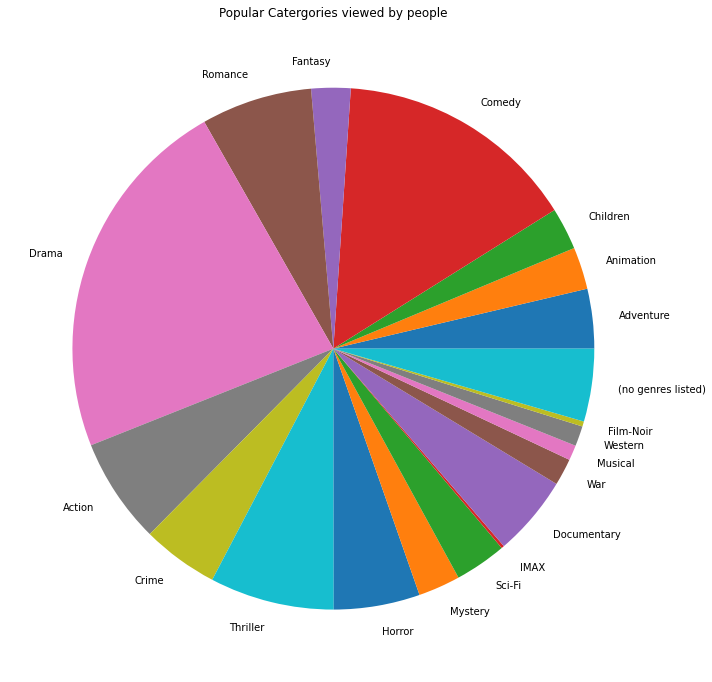

In [24]:
# PLOT A PIE
plt.figure (figsize = (12,12))
plt.pie(list(genre_cnt.values()), labels = genre_cnt.keys())
plt.title("Popular Catergories viewed by people");


## Hypothesis = most watched.. Comedy >> Adventure
## Actual result = Drama is the most watched instead...

In [25]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [26]:
ratings.shape

(25000095, 4)

In [27]:
ratings['rating'].nunique()

10

In [28]:
ratings['rating'].unique()

array([5. , 3.5, 4. , 2.5, 4.5, 3. , 0.5, 2. , 1. , 1.5])

In [29]:
ratings.userId.value_counts()

72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
21443        20
45297        20
82652        20
30764        20
20369        20
Name: userId, Length: 162541, dtype: int64

In [30]:
len(ratings.userId.value_counts())

162541

In [31]:
ratings.userId.nunique()

162541

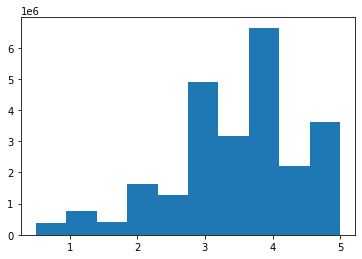

In [32]:
plt.hist(ratings.rating);

In [33]:
## From this histogram, Most movies are given 4 ratings

## Top 10 movies list all time
# Combine two datasets = merge

In [34]:
merge_df = pd.merge(movie, ratings, on = 'movieId')
merge_df.head()

,movieId,title,genres,gen_cat,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",8,4.0,890492517


In [35]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000095 entries, 0 to 25000094
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   title      object 
 2   genres     object 
 3   gen_cat    object 
 4   userId     int64  
 5   rating     float64
 6   timestamp  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.5+ GB


In [36]:
# movieid, title, rating
# create subset of merge_df with only 3 columns

movie_rating_df = merge_df[['movieId','title','rating']]
movie_rating_df.head()

,movieId,title,rating
0,1,Toy Story (1995),3.5
1,1,Toy Story (1995),4.0
2,1,Toy Story (1995),3.0
3,1,Toy Story (1995),4.0
4,1,Toy Story (1995),4.0


In [37]:
# Groupby movieid, rating
# Sort values by rating field
# head(10)

movie_rating_df.groupby(['movieId','title']).mean().sort_values(by = 'rating', ascending = False).head(10)

,,rating
movieId,title,
136782,The Girl is in Trouble (2015),5.0
186119,A Gift Horse (2015),5.0
137032,The Perfect Neighbor (2005),5.0
184643,Relentless (2018),5.0
137038,The Perfect Wife (2001),5.0
197231,The Harrow (2016),5.0
184669,Devil's Whisper (2017),5.0
137048,Perfect Child (2007),5.0
137050,The Rival (2006),5.0


In [38]:
len(merge_df[merge_df.movieId == 136782])

1

In [39]:
# findings
# Only one person rated that movie 5stars, so it was up to top 10
# Solution setup a minimun rating count / threshhold > 100 or > 200 users

count_rate = movie_rating_df.groupby(['movieId','title']).count()
count_rate

,,rating
movieId,title,
1,Toy Story (1995),57309
2,Jumanji (1995),24228
3,Grumpier Old Men (1995),11804
4,Waiting to Exhale (1995),2523
5,Father of the Bride Part II (1995),11714
...,...,...
209157,We (2018),1
209159,Window of the Soul (2001),1
209163,Bad Poems (2018),1


In [40]:
# Apply threshhold using apply and lambda function

threshold_rating = count_rate.apply(lambda x:x ['rating']>500, axis = 1)
threshold_df = count_rate[threshold_rating]

threshold_df.head()

,,rating
movieId,title,
1,Toy Story (1995),57309
2,Jumanji (1995),24228
3,Grumpier Old Men (1995),11804
4,Waiting to Exhale (1995),2523
5,Father of the Bride Part II (1995),11714


In [41]:
# Apply threshold to new movie rating and NOT the average of ratings

# threshold df with number of rating counts per movie
# merged df

final_merge_df = pd.merge(merge_df,threshold_df, on = 'movieId')
final_merge_df.head()

,movieId,title,genres,gen_cat,userId,rating_x,timestamp,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",2,3.5,1141415820,57309
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",3,4.0,1439472215,57309
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",4,3.0,1573944252,57309
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,858625949,57309
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",8,4.0,890492517,57309


In [42]:
final_movie_rating_df =final_merge_df[['movieId','title','rating_x','rating_y']]

In [47]:
answer = final_movie_rating_df.groupby(['movieId','title']).mean().sort_values(by = 'rating_x', ascending = False)

In [48]:
answer.head()

,,rating_x,rating_y
movieId,title,,
171011,Planet Earth II (2016),4.483096,1124
159817,Planet Earth (2006),4.464797,1747
318,"Shawshank Redemption, The (1994)",4.413576,81482
170705,Band of Brothers (2001),4.398599,1356
858,"Godfather, The (1972)",4.324336,52498
